<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_09/CAP417_HandsOn09_Barauna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP 417 - PARTE C - HANDS-ON 01

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)



Bibliotecas e Comandos Necessários:

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.mlab as mlab

%matplotlib inline

Importação das Séries Temporais para este notebook:

In [172]:
# #Importar um arquivo do seu desktop para o Colab

# #File from your computer:
from google.colab import files

#Downloading data
!gdown --id 1HuCXmgk2tKq4Bo6Uvl3m2-Bwhn2cLvgg
!gdown --id 1STW2t3V3MqJM9epEHje0eNZATSTjQrSL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HuCXmgk2tKq4Bo6Uvl3m2-Bwhn2cLvgg
To: /content/endo.csv
100% 30.7k/30.7k [00:00<00:00, 37.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1STW2t3V3MqJM9epEHje0eNZATSTjQrSL
To: /content/exo.csv
100% 31.8k/31.8k [00:00<00:00, 37.1MB/s]


In [3]:
dfendo = pd.read_csv('endo.csv')
dfexo = pd.read_csv('exo.csv')

## STEP01: 
Plotando a ST (com Opção de Média Zero)



In [ ]:
#Opções de Normalização
#dx = (dx-min(dx))/(max(dx)-min(dx))
#Obs: Não é necessário neste hands-on

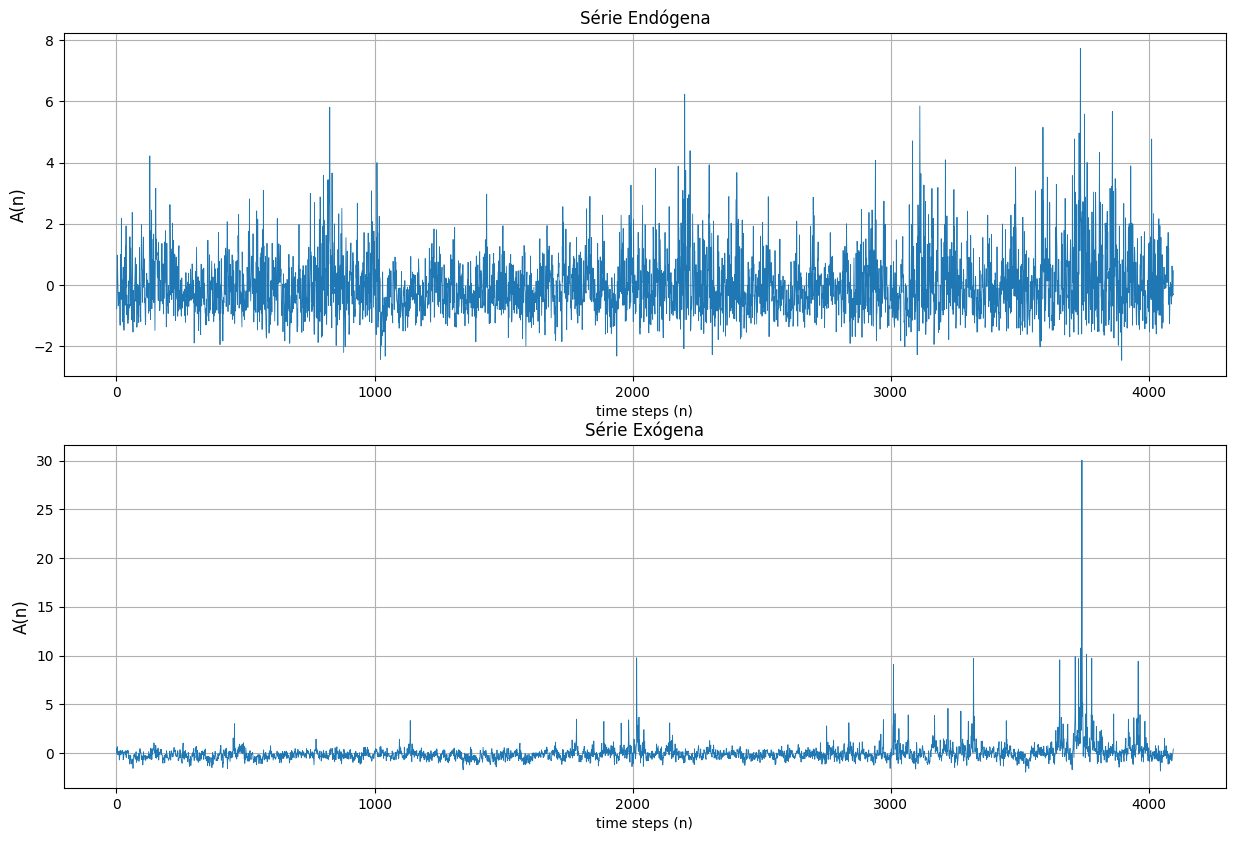

In [173]:
figure(figsize=(15,10),dpi=100)
dx=dfendo
dy=dfexo

plt.subplot(2,1,1)
dx=(dx - np.mean(dx))/np.std(dx) #Exógeno Normalizado
plt.plot(dx, linewidth=0.6)
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.title('Série Endógena')
plt.grid()

plt.subplot(2,1,2)
dy=(dy - np.mean(dy))/np.std(dy) #Endógeno Normalizado
plt.plot(dy, linewidth=0.6)
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.title('Série Exógena')

plt.grid()
plt.show()

## STEP 2: 
OBTER $3\sigma$ E REMOVER VALORES ACIMA DE $3\sigma$  


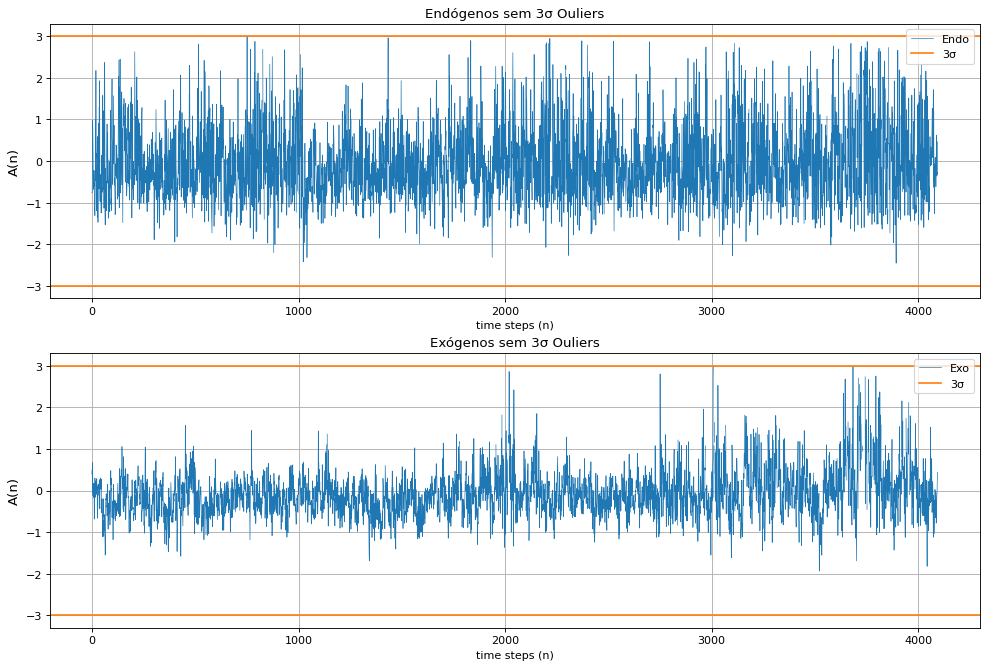

In [175]:
from matplotlib.pyplot import figure

### ENDO ###
#Identificação de σ
sigma_endo = float(np.std(dx))
#Remoção de 3σ
dx1 = dx[(dx <= 3*sigma_endo)]

### EXO ###
#Identificação de σ
sigma_exo = float(np.std(dy))
#Remoção de 3σ
dy1 = dy[(dy <= 3*sigma_exo)]
#https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value


figure(figsize=(15,10),dpi=80)
plt.subplot(2,1,1)
plt.plot(dx1, color="C0", linewidth=0.6,label='Endo')
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.axhline(y=3*sigma_endo,color='C1',label='3σ')
plt.axhline(y=-3*sigma_endo,color='C1')
plt.title('Endógenos sem 3σ Ouliers')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(dy1, color="C0", linewidth=0.6,label='Exo')
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.axhline(y=3*sigma_exo,color='C1',label='3σ')
plt.axhline(y=-3*sigma_exo,color='C1')
plt.title('Exógenos sem 3σ Ouliers')
plt.grid()
plt.legend()

plt.show()

Veja exemplo na transparencia enviada ao final da aula 2. Nesse caso, teremos uma 2a ST a partir da 1a ST. A original e a outra sem as flutuações extremas.
Denomine essa 2a ST como dfendo2 ou dfexo2. Plote os histogramas para cada uma r calcule os momentos estatísticos K e S, seguindo os passos abaixo.  Note que teremos ao final 4 series temporais: dfendo e dfendo2, dexo e dexo2. 

In [ ]:
#IMPLEMENTAR A IDENTIFICACAO E A EXTRAÇÃO DOS VALORES > 3SIGMA, 
#GERANDO A SEGUNDA SERIE SEM AS FLUTUAÇÕES EXTREMAS.

## STEP 3: 
HISTOGRAMA COM AJUSTE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


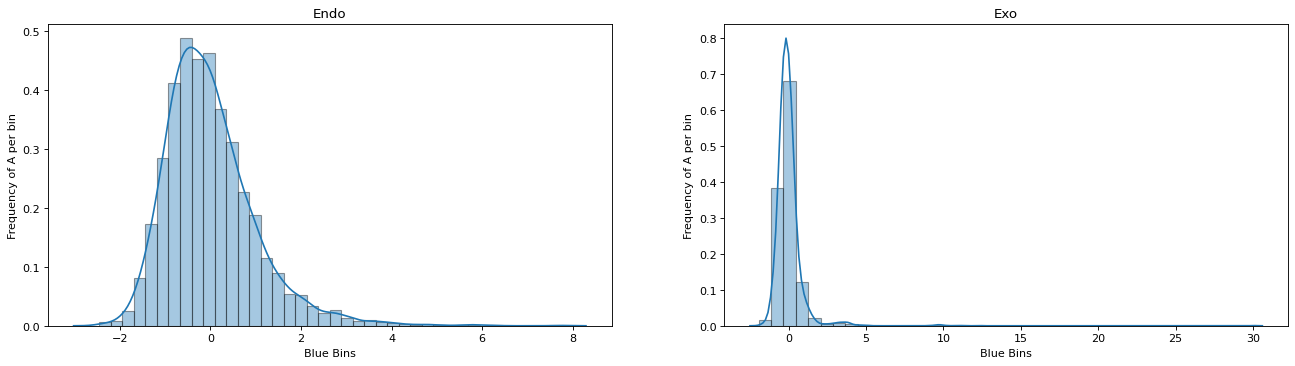

In [179]:
# seaborn histogram with Kernel Density Estimation
figure(figsize=(20,5),dpi=80)
plt.subplot(1,2,1)
sns.distplot(dx, bins=40, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('Endo')

plt.subplot(1,2,2)
sns.distplot(dy, bins=40, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('Exo')

plt.show()

## STEP 4: 
CÁLCULO DOS MOMENTOS ESTATÍSTICOS E PLOTAGEM DOS PARAMETROS DE CULLEN-FREY ($K$ E $S^2$)

In [142]:
def momento_estat(df):
  from scipy.stats import skew, kurtosis
  A=df
  m=np.mean(A)
  std=np.std(A)
  s=skew(A)
  k1=kurtosis(A)
  k2=k1+3

  print("mean =            ", m, end='\n')
  print("std =             ", std, end='\n')
  print("skewness =        ", s, end='\n')
  print("Fisher Kurtosis = ", k1, end='\n')
  print("Pearson Kurtosis =", k2, end='\n\n')

  #ss=s*s
  #k=k2

  # statrib = (m, std, s, k2)
  # print("All set (Pearson Stat):")
  # for n in statrib:
      
  #     print(n, end=' , ')
  #print('\n') 
  print()

In [143]:
print('SERIE: ENDÓGENA')
momento_estat(dfendo)

print('SERIE: EXÓGENA')
momento_estat(dfexo)

print('SERIE: ENDÓGENA NORMALIZADA')
momento_estat(dx)

print('SERIE: EXÓGENA NORMALIZADA')
momento_estat(dy)

print('SERIE: ENDÓGENA')
momento_estat(dx1)

print('SERIE: EXÓGENA')
momento_estat(dy1)




SERIE: ENDÓGENA
mean =             1.0206    1.00096
dtype: float64
std =              1.0206    0.610907
dtype: float64
skewness =         [1.32881725]
Fisher Kurtosis =  [3.85028336]
Pearson Kurtosis = [6.85028336]


SERIE: EXÓGENA
mean =             2.7859    0.999562
dtype: float64
std =              2.7859    3.062872
dtype: float64
skewness =         [10.48391972]
Fisher Kurtosis =  [231.05387008]
Pearson Kurtosis = [234.05387008]


SERIE: ENDÓGENA NORMALIZADA
mean =             1.6657412120383301e-15
std =              1.0000000000000002
skewness =         [1.32881725]
Fisher Kurtosis =  [3.85028336]
Pearson Kurtosis = [6.85028336]


SERIE: EXÓGENA NORMALIZADA
mean =             2.7859    5.789698e-17
dtype: float64
std =              2.7859    1.0
dtype: float64
skewness =         [10.48391972]
Fisher Kurtosis =  [231.05387008]
Pearson Kurtosis = [234.05387008]


SERIE: ENDÓGENA
mean =             -0.05451215033062057
std =              0.8852935776398103
skewness =         0.6

##STEP 5: 
CONSTRUA E PLOTE O ESPAÇO DE PARÂMETROS (KURTOSIS X QUADRADO DO SKEWNESS) COM OS RESPECTIVOS VALORES PARA ENDO.CSV (2 ST) E EXO.CSV (2 ST) (USE CORES DIFRENTES)

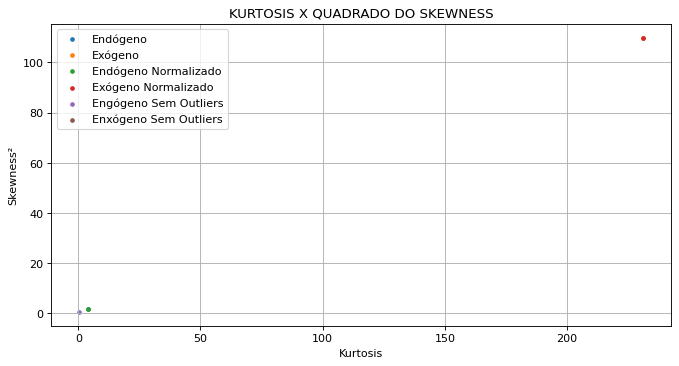

In [169]:
size = 10
figure(figsize=(10,5),dpi=80)
plt.scatter(kurtosis(dfendo),skew(dfendo)**2,label='Endógeno'    ,s=size)
plt.scatter(kurtosis(dfexo),skew(dfexo)**2,label='Exógeno'       ,s=size)
plt.scatter(kurtosis(dx),skew(dx)**2,label='Endógeno Normalizado',s=size)
plt.scatter(kurtosis(dy),skew(dy)**2,label='Exógeno Normalizado',s=size)
plt.scatter(kurtosis(dx1),skew(dx1)**2,label='Engógeno Sem Outliers',s=size)
plt.scatter(kurtosis(dy1),skew(dy1)**2,label='Enxógeno Sem Outliers',s=size)
plt.legend()
plt.xlabel("Kurtosis")
plt.ylabel("Skewness²")
plt.title('KURTOSIS X QUADRADO DO SKEWNESS')
plt.grid()
plt.show()